In [ ]:
# Importar herramientas
import pandas as pd
from plotly.graph_objs import Bar, Layout
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el archivo CSV en un DataFrame
df = pd.read_csv('/content/data movilidad.csv')

In [ ]:
# reemplazar la categoría "Míercoles" con "Miércoles"
df['dia'] = df['dia'].replace('Míercoles', 'Miércoles')

# Reemplazar todas las comas por puntos en la columna "afluencia_tarjeta"
df['afluencia_total_preliminar'] = df['afluencia_total_preliminar'].str.replace(',', '')
df['afluencia_boleto'] = df['afluencia_boleto'].str.replace(',', '')
df['afluencia_tarjeta'] = df['afluencia_tarjeta'].str.replace(',', '')

In [ ]:
df.head()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,11238
1,2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,29475
2,3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,31855
3,4,Ecobici,NaN,Miércoles,2020-03-04,NaN,NaN,31477
4,5,Ecobici,NaN,Jueves,2020-03-05,NaN,NaN,31493


In [ ]:
# rellenar los valores NaN con ceros
df.fillna(value=0, inplace=True)

In [ ]:
df.head()

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,0,Domingo,2020-03-01,0,0,11238
1,2,Ecobici,0,Lunes,2020-03-02,0,0,29475
2,3,Ecobici,0,Martes,2020-03-03,0,0,31855
3,4,Ecobici,0,Miércoles,2020-03-04,0,0,31477
4,5,Ecobici,0,Jueves,2020-03-05,0,0,31493


In [ ]:
print(df.dtypes)

id                             int64
organismo                     object
linea_servicio                object
dia                           object
fecha                         object
afluencia_tarjeta             object
afluencia_boleto              object
afluencia_total_preliminar    object
dtype: object


In [ ]:
# Convertir la columna "fecha" a tipo de datos datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Convertir la columna "afluencia_tarjeta" a tipo de datos float
df['afluencia_tarjeta'] = df['afluencia_tarjeta'].astype('float64')

# Convertir la columna "afluencia_tarjeta" a tipo de datos float
df['afluencia_boleto'] = df['afluencia_boleto'].astype('float64')

# Convertir la columna "afluencia_tarjeta" a tipo de datos float
df['afluencia_total_preliminar'] = df['afluencia_total_preliminar'].astype('float64')

In [ ]:
print(df.dtypes)

id                                     int64
organismo                             object
linea_servicio                        object
dia                                   object
fecha                         datetime64[ns]
afluencia_tarjeta                    float64
afluencia_boleto                     float64
afluencia_total_preliminar           float64
dtype: object


In [ ]:
print(df['organismo'].value_counts())

STC                5868
STE-Trolebús       4126
RTP                3671
Metrobús           3461
Ecobici             489
STE-Tren Ligero     489
Suburbano           489
STE-Cablebús        121
Name: organismo, dtype: int64


In [ ]:
# Seleccionar solo los registros donde "organismo" es "Ecobici"
ecobici = df[df['organismo'] == 'Ecobici']

# Verificar si hay valores nulos en las columnas "linea_servicio", "afluencia_tarjeta" y "afluencia_boleto"
print(ecobici['linea_servicio'].isnull().value_counts())
print(ecobici['afluencia_tarjeta'].isnull().value_counts())
print(ecobici['afluencia_boleto'].isnull().value_counts())

False    489
Name: linea_servicio, dtype: int64
False    489
Name: afluencia_tarjeta, dtype: int64
False    489
Name: afluencia_boleto, dtype: int64


In [ ]:
ecobici = df.loc[df['organismo'] == 'Ecobici']

In [ ]:
ecobici_agrupado = ecobici.groupby(['fecha'])['afluencia_total_preliminar'].sum().reset_index()

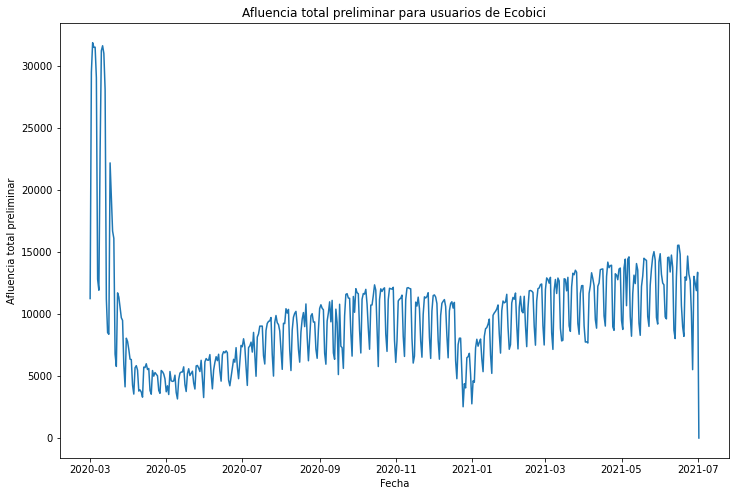

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(ecobici_agrupado['fecha'], ecobici_agrupado['afluencia_total_preliminar'])
plt.xlabel('Fecha')
plt.ylabel('Afluencia total preliminar')
plt.title('Afluencia total preliminar para usuarios de Ecobici')
plt.show()

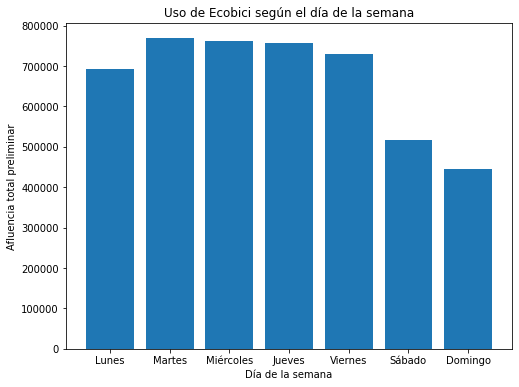

In [ ]:
# Definir el orden de los días de la semana
orden_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Agrupar los datos por día de la semana y sumar la afluencia total preliminar
ecobici_dia_semana = df[df['organismo'] == 'Ecobici'].groupby('dia')['afluencia_total_preliminar'].sum()

# Reordenar los datos según el orden de los días de la semana
ecobici_dia_semana = ecobici_dia_semana.reindex(orden_dias_semana)

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(ecobici_dia_semana.index, ecobici_dia_semana.values)
plt.xlabel('Día de la semana')
plt.ylabel('Afluencia total preliminar')
plt.title('Uso de Ecobici según el día de la semana')
plt.show()

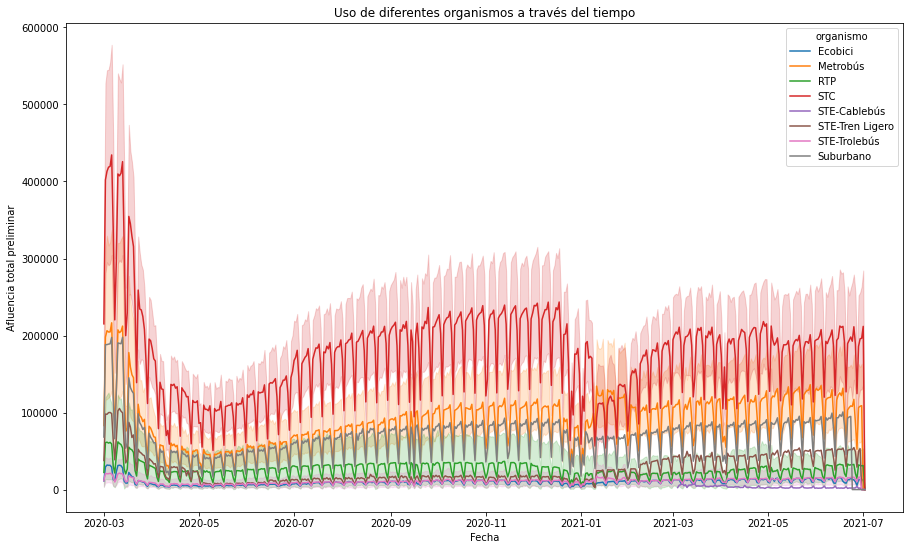

In [ ]:
# Crear la gráfica de espagueti
plt.figure(figsize=(15, 9))
sns.lineplot(x='fecha', y='afluencia_total_preliminar', hue='organismo', data=df)
plt.title('Uso de diferentes organismos a través del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Afluencia total preliminar')
plt.show()